<a href="https://colab.research.google.com/github/ANUPRIYAR/HackerEarth_submissions/blob/main/Holiday_season_resnet.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Below steps are followed for the Ist classification model:

1. Changing the directory structure of training images to strucure similar to below:

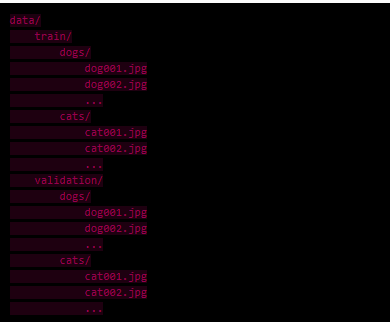

2. Import the ResNet50 model as the base model and use the pretrained weights of imagenet model for our model
3. Combine the base model with fully connected layers to get the desired number of categories as output
3. Perform data augemntation to increase the dataset. 
4. Train the model with generated dataset and validate on Validation dataset.

We create 2nd improved classification model with few minor changes:
1. We will use stratified k fold to split the dataset instead of train_test_split so as to preserve the relative proportion of each class.
2. Train the model with newly generated dataset and validate on Validation dataset.


In [ ]:
!unzip /content/drive/MyDrive/Deep_learning/Datasets/14feeca248c811eb.zip

# **Importing Modules**

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import cv2
import matplotlib.image as mpimg
import os
from keras.models import Sequential
from keras.layers import Dense, Conv2D, Flatten, Dropout, MaxPooling2D
from tqdm import tqdm
from keras.preprocessing import image
from keras.utils import to_categorical 
import warnings
from sklearn.model_selection import train_test_split
warnings.filterwarnings('ignore')
import shutil 
from keras.preprocessing.image import ImageDataGenerator
from keras import applications
from keras import Model
import keras
from sklearn.model_selection import StratifiedKFold

In [ ]:
train_dir = '/content/dataset/train'
test_dir = '/content/dataset/test'

In [ ]:
base_dir = '/content/dataset/'

In [ ]:
train_df = pd.read_csv('/content/dataset/train.csv')
df = train_df.copy()

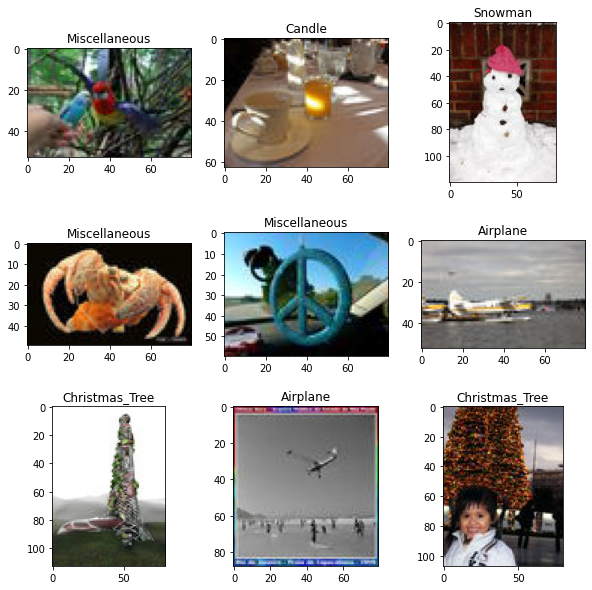

In [ ]:
count = 1
fig = plt.figure(figsize=(10,10))
for i, label in df.values:
  if count <=9 :
    fig.add_subplot(3,3,count)
    img = mpimg.imread(train_dir + '/' + i)
    plt.title(label)
    plt.imshow(img)
    count +=1
plt.show()

# Converting train dataset to <class 1>/<images_of class 1>...... format

In [ ]:
# Create new training directory
os.mkdir(os.path.join('/content/dataset/', 'training'))

In [ ]:
new_train_dir = '/content/dataset/training'

In [ ]:
# Creating folder for each Class inside new training directory
labels = train_df.Class.unique()
for label in labels:
  os.mkdir(os.path.join(new_train_dir, label))

In [ ]:
# Copy images files to its repective directory based on its labels
for i, label in train_df.values:
  shutil.copy(os.path.join(train_dir,i), new_train_dir + '/' + label + '/') 

In [ ]:
# Sanity check
Total_files = 0
for folder in os.listdir(new_train_dir):
  files = os.listdir(new_train_dir + '/' + folder)
  print("Total files stored in", folder, ":", len(files) )
  Total_files += len(files)
print("Total images in all the folders:", Total_files)

Total files stored in Jacket : 640
Total files stored in Candle : 593
Total files stored in Christmas_Tree : 1539
Total files stored in Airplane : 535
Total files stored in Miscellaneous : 2801
Total files stored in Snowman : 361
Total images in all the folders: 6469


In [ ]:
batch_size = 32
img_height = 32
img_width = 32

In [ ]:
!pip install split-folders

In [ ]:
import splitfolders
splitfolders.ratio(new_train_dir, output="output", seed=1337, ratio=(.8, .2), group_prefix=None)

Copying files: 6469 files [00:00, 7694.29 files/s]


In [ ]:
obase_dir = '/content/output'
train_data_dir = '/content/output/train'
validation_data_dir = '/content/output/val'

# **Create Resnet model**

In [ ]:
base_model = applications.ResNet50(weights='imagenet', include_top = False, input_shape=(img_height,img_width,3))

94773248/94765736 [==============================] - 1s 0us/step


In [ ]:
# Get the shape of the output of the last layer of base model
base_output_shape = base_model.output_shape[1:]

In [ ]:
top_model = Sequential()
top_model.add(Flatten(input_shape=base_output_shape))
top_model.add(Dropout(0.3))
top_model.add(Dense(128, activation='relu'))
top_model.add(Dropout(0.5))
top_model.add(Dense(6, activation='softmax'))

# Combine base model and top model
model = Model(inputs=base_model.input , outputs=top_model(base_model.output))

model.compile(optimizer=keras.optimizers.SGD(lr=1e-4, momentum=0.9), loss='categorical_crossentropy', metrics=['accuracy'])

In [ ]:
train_datagen = ImageDataGenerator(
    rescale=1. / 255,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True)

# this is the augmentation configuration we will use for testing:
# only rescaling
test_datagen = ImageDataGenerator(rescale=1. / 255)

train_generator = train_datagen.flow_from_directory(
    train_data_dir,
    target_size=(img_width, img_height),
    class_mode='categorical',
    batch_size=batch_size)

validation_generator = test_datagen.flow_from_directory(
    validation_data_dir,
    target_size=(img_width, img_height),
    class_mode='categorical',
    batch_size=batch_size
    )

model.fit_generator(
    train_generator,
    # steps_per_epoch=nb_train_samples // batch_size,
    epochs=20,
    validation_data=validation_generator)
    # validation_steps=nb_validation_samples // batch_size)


Found 5173 images belonging to 6 classes.
Found 1296 images belonging to 6 classes.
Epoch 1/20
162/162 [==============================] - 20s 54ms/step - loss: 3.1029 - accuracy: 0.2657 - val_loss: 76.3106 - val_accuracy: 0.2377
Epoch 2/20
162/162 [==============================] - 7s 42ms/step - loss: 1.8930 - accuracy: 0.3631 - val_loss: 76.3642 - val_accuracy: 0.1597
Epoch 3/20
162/162 [==============================] - 7s 42ms/step - loss: 1.5982 - accuracy: 0.4221 - val_loss: 11.2120 - val_accuracy: 0.3758
Epoch 4/20
162/162 [==============================] - 7s 42ms/step - loss: 1.4290 - accuracy: 0.4790 - val_loss: 5.5915 - val_accuracy: 0.2546
Epoch 5/20
162/162 [==============================] - 7s 42ms/step - loss: 1.3466 - accuracy: 0.5219 - val_loss: 1.6186 - val_accuracy: 0.5085
Epoch 6/20
162/162 [==============================] - 7s 43ms/step - loss: 1.2950 - accuracy: 0.5302 - val_loss: 1.1879 - val_accuracy: 0.5849
Epoch 7/20
162/162 [==============================] - 

# **Getting predictions for test Dataset**

In [ ]:
test_image_list = list(sorted(os.listdir('/content/dataset/test/')))

In [ ]:
test_df = pd.DataFrame(test_image_list, columns=['Image'])

In [ ]:
x_test = []
for i in tqdm(range(test_df.shape[0])):
  img = image.load_img(test_dir + '/' + test_df['Image'][i], target_size=(img_width,img_height,3))
  img = image.img_to_array(img)
  img = img/255
  x_test.append(img)
x_test = np.array(x_test)

100%|██████████| 3489/3489 [00:01<00:00, 2809.21it/s]


In [ ]:
pred = model.predict(x_test)

In [ ]:
classes= sorted(labels)

In [ ]:
y_pred = []
for i in range(x_test.shape[0]):
  y_pred.append(classes[np.argmax(pred[i])])

In [ ]:
test_df['Class'] = y_pred

# **Saving the prediction file**

In [ ]:
test_df.to_csv('test.csv')

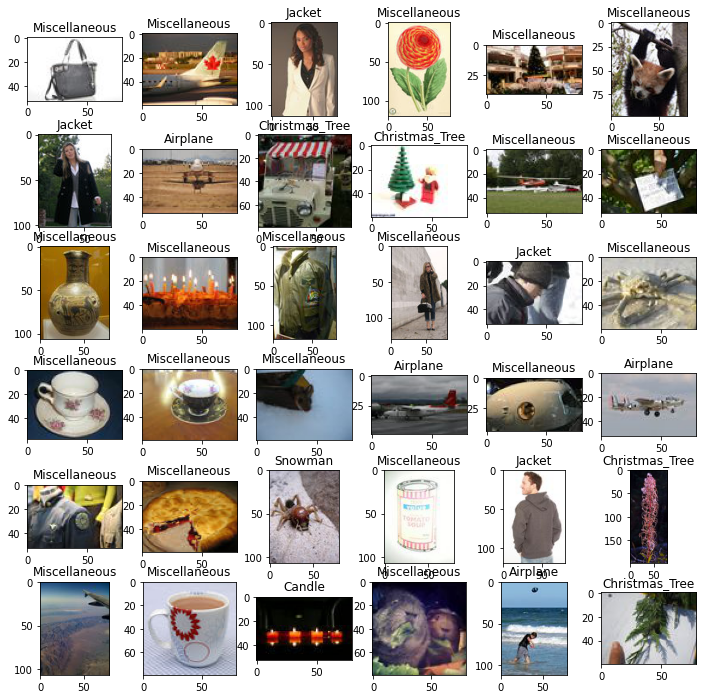

In [ ]:
count = 1
fig = plt.figure(figsize=(12,12))
for i, label in test_df.values:
  if count <=36 :
    fig.add_subplot(6,6,count)
    img = mpimg.imread(test_dir + '/' + i)
    plt.title(label)
    plt.imshow(img)
    count +=1
plt.show()

# Splitting the train dataset using K fold to maintain the ratio of each class

In [ ]:
train_x = train_df.drop('Class', axis=1)
train_y = train_df.drop('Image', axis=1)

In [ ]:
train_datagen = ImageDataGenerator(
    rescale=1. / 255,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True)
validation_datagen = ImageDataGenerator(rescale = 1./255)


kfold = StratifiedKFold(n_splits=7,shuffle=True,random_state=42)
j = 0
for train_idx, val_idx in list(kfold.split(train_x,train_y)):
    x_train_df = df.iloc[train_idx]
    x_valid_df = df.iloc[val_idx]
    j+=1
x_train_df.head()
    

,Image,Class
0,image3476.jpg,Miscellaneous
1,image5198.jpg,Candle
2,image4183.jpg,Snowman
3,image1806.jpg,Miscellaneous
4,image7831.jpg,Miscellaneous


In [ ]:
BATCH_SIZE = 32
training_set = train_datagen.flow_from_dataframe(dataframe=x_train_df, 
                                                 directory=train_dir,
                                              x_col="Image", y_col="Class",
                                              target_size=(img_width, img_height),
                                              class_mode='categorical',
                                               batch_size=BATCH_SIZE)

validation_set = validation_datagen.flow_from_dataframe(dataframe=x_valid_df, 
                                                        directory=train_dir,
                                              x_col="Image", y_col="Class",
                                              target_size=(img_width, img_height),
                                              class_mode='categorical',
                                               batch_size=BATCH_SIZE)




history = model.fit_generator( training_set,validation_data=validation_set, epochs =50)
                                  
                                    

Found 5545 validated image filenames belonging to 6 classes.
Found 924 validated image filenames belonging to 6 classes.
Epoch 1/50
174/174 [==============================] - 8s 45ms/step - loss: 0.8874 - accuracy: 0.6833 - val_loss: 0.6718 - val_accuracy: 0.7468
Epoch 2/50
174/174 [==============================] - 7s 42ms/step - loss: 0.8933 - accuracy: 0.6853 - val_loss: 0.6942 - val_accuracy: 0.7489
Epoch 3/50
174/174 [==============================] - 7s 41ms/step - loss: 0.8495 - accuracy: 0.7015 - val_loss: 0.6887 - val_accuracy: 0.7403
Epoch 4/50
174/174 [==============================] - 7s 42ms/step - loss: 0.8674 - accuracy: 0.6913 - val_loss: 0.6832 - val_accuracy: 0.7500
Epoch 5/50
174/174 [==============================] - 7s 42ms/step - loss: 0.8375 - accuracy: 0.7039 - val_loss: 0.6913 - val_accuracy: 0.7597
Epoch 6/50
174/174 [==============================] - 7s 41ms/step - loss: 0.8065 - accuracy: 0.7152 - val_loss: 0.6816 - val_accuracy: 0.7576
Epoch 7/50
174/174 [=

# Get the predictions based on newly trained model

In [ ]:
test_image_list = list(sorted(os.listdir('/content/dataset/test/')))
test_df = pd.DataFrame(test_image_list, columns=['Image'])

x_test = []
for i in tqdm(range(test_df.shape[0])):
  img = image.load_img(test_dir + '/' + test_df['Image'][i], target_size=(img_width,img_height,3))
  img = image.img_to_array(img)
  img = img/255
  x_test.append(img)
x_test = np.array(x_test)

pred = model.predict(x_test)

classes= sorted(labels)

y_pred = []
for i in range(x_test.shape[0]):
  y_pred.append(classes[np.argmax(pred[i])])

test_df['Class'] = y_pred

100%|██████████| 3489/3489 [00:01<00:00, 2968.20it/s]


In [ ]:
test_df.to_csv('submission.csv')